### Part 1:

For each step incremeny the head by one and then calculate move for tail.

In [1]:
from dataclasses import dataclass, field
import numpy as np
from matplotlib import pyplot as plt

@dataclass
class seg:
    """Class for keeping track location of segment of a knots."""
    x: int
    y: int
    locations: set = field(default_factory=set)
    
    def get_location(self):
        """Save & return location"""
        #print(self.x,self.y)
        self.locations.add((self.x, self.y))
        return (self.x, self.y)

    def update_head_location(self, direction, val):
        """Accepts direction and integer value & updates, only done by true head"""
        if direction == 'R':
            self.x += val
        elif direction == 'L':
            self.x -= val
        elif direction == 'U':
            self.y += val
        elif direction == 'D':
            self.y -= val 
        else:
            raise ValueError('You entered an invalid direction')   
        
    def compare_to_head(self, head_class):
        """Compare location to head, update location accordingly"""
        
        # read "head" locations
        xh, yh = head_class.get_location()
        #print(f"{(self.x,self.y)}, vs {(xh, yh)}")
        
        # find diffs relative to self (so a positive indicates a negative move by head
        # wish I wrote this the other way...
        diff_x = self.x - xh
        diff_y = self.y - yh
        
        if (abs(diff_x) <= 1) and (abs(diff_y) <= 1): # touching case
            pass
        elif (diff_x >= 1) and (diff_y >= 1): # left, down
            self.x -= 1
            self.y -= 1
        elif (diff_x <= -1) and (diff_y >= 1): # right, down
            self.x += 1
            self.y -= 1
        elif (diff_x <= -1) and (diff_y <= -1): # right, up
            self.x += 1
            self.y += 1
        elif (diff_x >= 1) and (diff_y <= -1): # left, up
            self.x -= 1
            self.y += 1
        elif (diff_x > 1):
                self.x -= 1
        elif (diff_x < -1):
                self.x += 1
        elif (diff_y > 1):
                self.y -= 1
        elif (diff_y < -1):
                self.y += 1 
        else:
            raise ValueError('Something is incorrect in your head to tail comparison') 

In [2]:
# read sample data
with open('data/day09_sample.txt') as fh:
    data = [line.strip() for line in fh.readlines()]
moves = [x.split(' ') for x in data]

# establish H & T
H = seg(0,0)
T = seg(0,0)
T.get_location()

# iterate over each move, and increment in direction step by step based on int val
for m in moves:
    for _ in range(int(m[1])):
        H.update_head_location(m[0], 1)
        T.compare_to_head(H)
        T.get_location()

assert(len(T.locations) == 13)

6098
6897


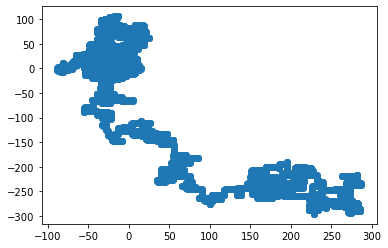

In [3]:
# read data
with open('data/day09.txt') as fh:
    data = [line.strip() for line in fh.readlines()]
moves = [x.split(' ') for x in data]

H = seg(0,0)
T = seg(0,0)
T.get_location()
t_coords = []
for m in moves:
    for _ in range(int(m[1])):
        H.update_head_location(m[0], 1)
        H.get_location()
        T.compare_to_head(H)
        t_coords.append(T.get_location())
        
print(len(T.locations))
print(len(H.locations)) # this should hold up in part B also
data = np.array(t_coords)
x, y = data.T
plt.scatter(x,y)
plt.show();

### Part B:

Logic: 
- I should be able to compare the `ith` node to the `ith + 1` node, and only use the `update_head_location` once per move on the `head` (0th index)
- Once the `head` (0th index) is updated, all subsequent indices are updated as needed.

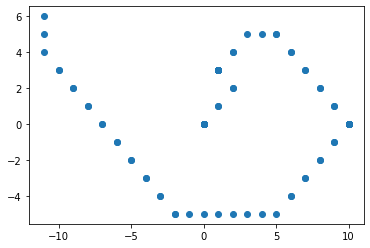

In [4]:
# read sample data
with open('data/day09_sample.txt') as fh:
    data = [line.strip() for line in fh.readlines()]
moves = [x.split(' ') for x in data]

segments = [seg(0,0) for _ in range(10)] # technically 9 heads & 9 tails

# update location to track start
[t.get_location() for t in segments]

for m in moves:
    for _ in range(int(m[1])):
        segments[0].update_head_location(m[0], 1) # update main head, which will have a ripple effect on others
        for i in range(9):
            segments[i+1].compare_to_head(segments[i])
            segments[i+1].get_location()

# confirm pass
assert(len(segments[9].locations) == 1)

# read sample data b -> more interesting visual
with open('data/day09_sampleb.txt') as fh:
    data = [line.strip() for line in fh.readlines()]

# build moves out
moves = [x.split(' ') for x in data]
segments = [seg(0,0) for _ in range(10)] # technically 9 heads & 9 tails

# update location to track start
[t.get_location() for t in segments]
t_coords = []

for m in moves:
    for _ in range(int(m[1])):
        segments[0].update_head_location(m[0], 1) # update main head, which will have a ripple effect on others
        for i in range(9):
            segments[i+1].compare_to_head(segments[i])
            segments[i+1].get_location()
            if i == 8:
                t_coords.append(segments[i+1].get_location()) # for visualization

# plot the tail
assert(len(segments[9].locations) == 36)
data = np.array(t_coords)
x, y = data.T
plt.scatter(x,y)
plt.show();

10
2597
6897


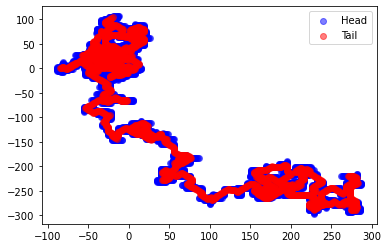

In [5]:
# read sample data
with open('data/day09.txt') as fh:
    data = [line.strip() for line in fh.readlines()]
moves = [x.split(' ') for x in data]

segments = [seg(0,0) for _ in range(10)] # technically 9 heads & 9 tails
print(len(segments))

# update location to track start
[t.get_location() for t in segments]
h_coords = []
t_coords = []

for m in moves:
    for _ in range(int(m[1])):
        segments[0].update_head_location(m[0], 1) # update main head, which will have a ripple effect on others
        segments[0].get_location()
        h_coords.append((segments[0].x, segments[0].y))
        for i in range(9):
            segments[i+1].compare_to_head(segments[i])
            segments[i+1].get_location()
            if i == 8:
                t_coords.append((segments[9].get_location()))

print(len(segments[9].locations))
print(len(segments[0].locations)) # head will travel just as far as in part 1

# plot for fun
data = np.array(list(set(h_coords)))
x1, y1 = data.T
data = np.array(list(set(t_coords)))
x2, y2 = data.T
plt.scatter(x1,y1, c = 'b', label = 'Head', alpha = 0.5)
plt.scatter(x2,y2, c = 'r', label = 'Tail', alpha = 0.5)
plt.legend()
plt.show();